In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib --quiet

In [3]:
!pip install hmmlearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 12.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from google.colab import drive

# Read datafile
data = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv', index_col='Date')

# Format column Date
data.index = pd.to_datetime(data.index,format='%m/%d/%Y')

# Drop column that aren't use
data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis = 1, inplace=True)

# Flip the column
data = data.iloc[::-1]

# Format column Price to float
data['Price'] = data.Price.str.replace(',','').astype(float)


# Just use the Price
gold_prices = data['Price'].values.reshape(-1, 1)

# Split dataset
train_size = int(0.7 * len(data['Price']))
Test_size = int(0.2 * len(data['Price']))
val_size = len(data['Price']) - train_size - Test_size


train_data = gold_prices[:train_size]
test_data = gold_prices[train_size:train_size+Test_size]
val_data = gold_prices[train_size+Test_size:]

# Create and train HMM model with training set
model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(train_data)

# Predict hidden state for training set
hidden_states_test = model.predict(test_data)
hidden_states_val = model.predict(val_data)

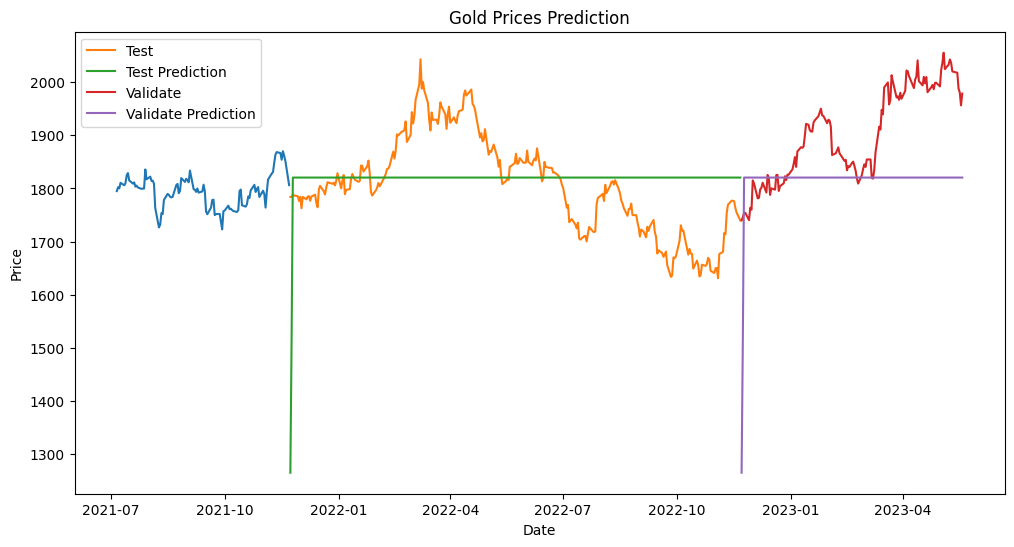

In [ ]:
train_data = data[:train_size]
test_data = data[train_size:train_size+Test_size]
val_data = data[train_size+Test_size:]

# Plot the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data, label='Test')
plt.plot(test_data.index, [model.means_[state][0] for state in hidden_states_test], label='Test Prediction')
plt.plot(val_data, label='Validate')
plt.plot(val_data.index, [model.means_[state][0] for state in hidden_states_val], label='Validate Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend()
plt.show()


In [ ]:
# # Calculate accuracy for each model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print("** Test **")
rmse = np.sqrt(mean_squared_error(test_data, [model.means_[state][0] for state in hidden_states_test]))
mape = mean_absolute_percentage_error(test_data, [model.means_[state][0] for state in hidden_states_test]) * 100
mse = mean_squared_error(test_data, [model.means_[state][0] for state in hidden_states_test])
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)

print("\n** Validate **")
rmse = np.sqrt(mean_squared_error(val_data, [model.means_[state][0] for state in hidden_states_val]))
mape = mean_absolute_percentage_error(val_data, [model.means_[state][0] for state in hidden_states_val]) * 100
mse = mean_squared_error(val_data, [model.means_[state][0] for state in hidden_states_val])
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)


** Test **
RMSE: 97.90726508202566
MAPE: 4.239401421000061
MSE: 9585.83255584204

** Validate **
RMSE: 126.44372131081828
MAPE: 5.0247764937076385
MSE: 15988.014658927881


# Split dataset (6-3-1)

---



In [ ]:
# Just use the Price
gold_prices = data['Price'].values.reshape(-1, 1)

# Split dataset
train_size = int(0.6 * len(data['Price']))
Test_size = int(0.3 * len(data['Price']))
val_size = len(data['Price']) - train_size - Test_size


train_data = gold_prices[:train_size]
test_data = gold_prices[train_size:train_size+Test_size]
val_data = gold_prices[train_size+Test_size:]


# Create and train HMM model with training set
model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(train_data)

# Predict hidden state for training set
hidden_states_test = model.predict(test_data)
hidden_states_val = model.predict(val_data)


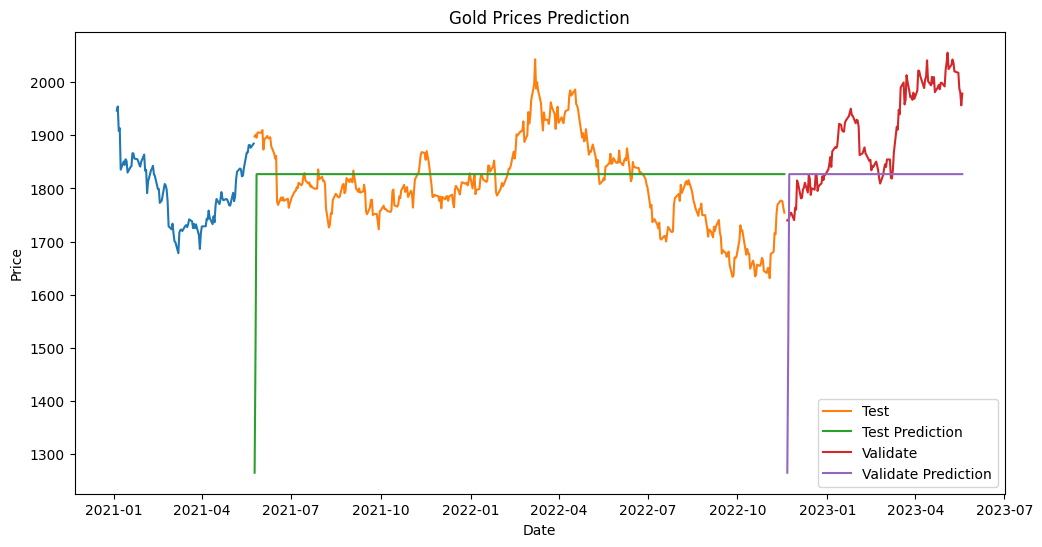

In [ ]:
train_data = data[:train_size]
test_data = data[train_size:train_size+Test_size]
val_data = data[train_size+Test_size:]

# Plot the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data, label='Test')
plt.plot(test_data.index, [model.means_[state][0] for state in hidden_states_test], label='Test Prediction')
plt.plot(val_data, label='Validate')
plt.plot(val_data.index, [model.means_[state][0] for state in hidden_states_val], label='Validate Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend()
plt.show()

In [ ]:
# # Calculate accuracy for each model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print("** Test **")
rmse = np.sqrt(mean_squared_error(test_data, [model.means_[state][0] for state in hidden_states_test]))
mape = mean_absolute_percentage_error(test_data, [model.means_[state][0] for state in hidden_states_test]) * 100
mse = mean_squared_error(test_data, [model.means_[state][0] for state in hidden_states_test])
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)

print("\n** Validate **")
rmse = np.sqrt(mean_squared_error(val_data, [model.means_[state][0] for state in hidden_states_val]))
mape = mean_absolute_percentage_error(val_data, [model.means_[state][0] for state in hidden_states_val]) * 100
mse = mean_squared_error(val_data, [model.means_[state][0] for state in hidden_states_val])
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)


** Test **
RMSE: 88.57149722797323
MAPE: 3.680910371289022
MSE: 7844.910121204869

** Validate **
RMSE: 121.9687016977842
MAPE: 4.834919192683675
MSE: 14876.364193843066


# Split dataset (5-3-2)

---



In [ ]:
# Just use the Price
gold_prices = data['Price'].values.reshape(-1, 1)

# Split dataset
train_size = int(0.5 * len(data['Price']))
Test_size = int(0.3 * len(data['Price']))
val_size = len(data['Price']) - train_size - Test_size


train_data = gold_prices[:train_size]
test_data = gold_prices[train_size:train_size+Test_size]
val_data = gold_prices[train_size+Test_size:]


# Create and train HMM model with training set
model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(train_data)

# Predict hidden state for training set
hidden_states_test = model.predict(test_data)
hidden_states_val = model.predict(val_data)

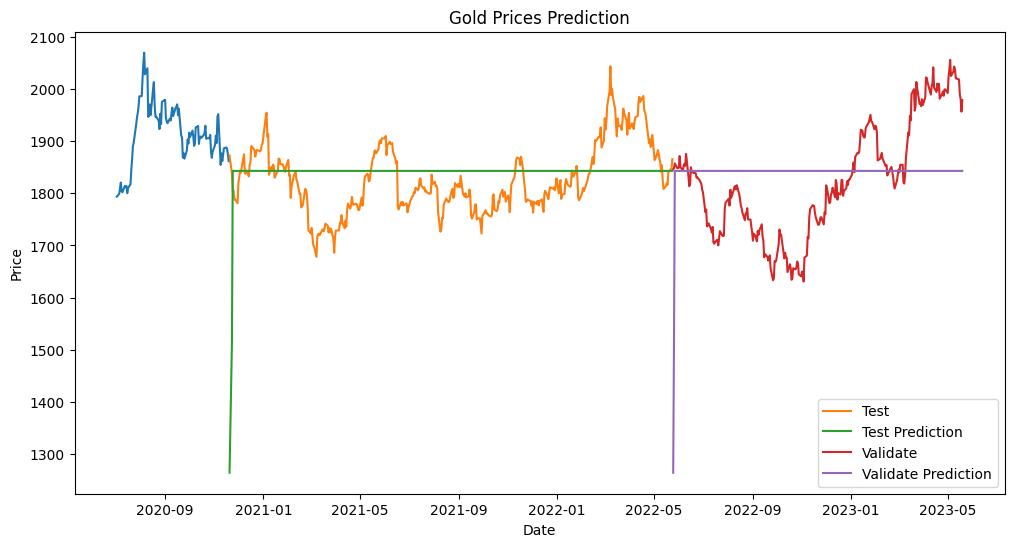

In [ ]:
train_data = data[:train_size]
test_data = data[train_size:train_size+Test_size]
val_data = data[train_size+Test_size:]

# Plot the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data, label='Test')
plt.plot(test_data.index, [model.means_[state][0] for state in hidden_states_test], label='Test Prediction')
plt.plot(val_data, label='Validate')
plt.plot(val_data.index, [model.means_[state][0] for state in hidden_states_val], label='Validate Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend()
plt.show()

In [ ]:
# # Calculate accuracy for each model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print("** Test **")
rmse = np.sqrt(mean_squared_error(test_data, [model.means_[state][0] for state in hidden_states_test]))
mape = mean_absolute_percentage_error(test_data, [model.means_[state][0] for state in hidden_states_test]) * 100
mse = mean_squared_error(test_data, [model.means_[state][0] for state in hidden_states_test])
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)

print("\n** Validate **")
rmse = np.sqrt(mean_squared_error(val_data, [model.means_[state][0] for state in hidden_states_val]))
mape = mean_absolute_percentage_error(val_data, [model.means_[state][0] for state in hidden_states_val]) * 100
mse = mean_squared_error(val_data, [model.means_[state][0] for state in hidden_states_val])
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)


** Test **
RMSE: 75.00729841277305
MAPE: 3.1551201848511385
MSE: 5626.094815182788

** Validate **
RMSE: 118.6162302386409
MAPE: 5.250969229142664
MSE: 14069.810076026268


In [ ]:
# # Just use Pricee column
# closing_prices = data['Price'].values.reshape(-1, 1)

# # Create and train HMM model with all the datafile
# model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
# model.fit(closing_prices)

# # Create hidden state for next 30days
# predicted_states = model.predict(closing_prices[-30:])

# # Predict price based on hidden state
# predicted_prices = [model.means_[int(state)][0] for state in predicted_states]

# # Plot the model
# actual_prices = closing_prices[-30:]
# # print(actual_prices)
# # print(range(len(actual_prices)))

# plt.figure(figsize=(12, 6))
# plt.plot(range(len(actual_prices)), actual_prices, label='Kết quả thực tế')
# plt.plot(range(len(actual_prices)), predicted_prices, label='Kết quả dự đoán')
# plt.xlabel('Ngày')
# plt.ylabel('Giá cổ phiếu')
# plt.title('Dự đoán giá cổ phiếu cho 30 ngày tiếp theo')
# plt.legend()
# plt.show()

In [ ]:
# print(predicted_prices)

In [ ]:
# # Calculate accuracy for each model
# from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
# mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100
# mse = mean_squared_error(actual_prices, predicted_prices)

# print("RMSE:", rmse)
# print("MAPE:", mape)
# print("MSE:", mse)

# Split dataset (7-2-1)

---



In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from google.colab import drive

# Read datafile
data = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv')

# Format column Date
data.Date = pd.to_datetime(data.Date,format='%m/%d/%Y')

# Drop column that aren't use
data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis = 1, inplace=True)

# Flip the column
data = data.iloc[::-1]

# Format column Price to float
data['Price'] = data.Price.str.replace(',','').astype(float)

# Check if data still contain null values
data = data.dropna()

gold_prices = data['Price'].values.reshape(-1, 1)

# Split dataset
train_size = int(0.7 * len(data['Price']))
Test_size = int(0.2 * len(data['Price']))
val_size = len(data['Price']) - train_size - Test_size


train_data = gold_prices[:train_size]
test_data = gold_prices[train_size:train_size+Test_size]
val_data = gold_prices[train_size+Test_size:]


In [ ]:
model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=50, random_state = 42)
model.fit(train_data)
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)
val_pred = model.predict(val_data)

train_states = pd.unique(train_pred)
print("Train states:",train_states)

test_states = pd.unique(test_pred)
print("Test states:",test_states)

val_states = pd.unique(val_pred)
print("val states:",val_states)

Train states: [2 0 1]
Test states: [2 0 1]
val states: [2 0 1]


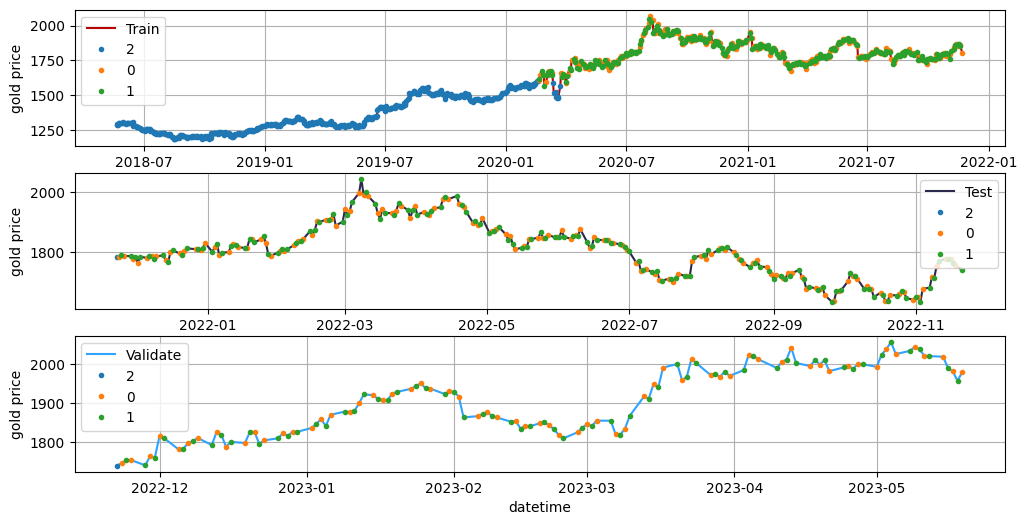

In [ ]:
train_data = data[:train_size]
test_data = data[train_size:train_size+Test_size]
val_data = data[train_size+Test_size:]

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
plt.plot(train_data.Date, train_data.Price, '-', color="#B70404")
for i in train_states:
    want = (train_pred == i)
    x = train_data.Date.iloc[want]
    y = train_data.Price.iloc[want]
    plt.plot(x, y, '.')
plt.legend(["Train",2,0,1])
plt.grid(True)
plt.xlabel("datetime")
plt.ylabel("gold price")

plt.subplot(3,1,2)
plt.plot(test_data.Date, test_data.Price, '-', color="#2B2A4C", label='Test')
for i in test_states:
    want = (test_pred == i)
    x = test_data.Date.iloc[want]
    y = test_data.Price.iloc[want]
    plt.plot(x, y, '.')
plt.legend(["Test",2,0,1])
plt.grid(True)
plt.xlabel("datetime")
plt.ylabel("gold price")

plt.subplot(3,1,3)
plt.plot(val_data.Date, val_data.Price, '-', color="#30A2FF", label='Validate')
for i in val_states:
    want = (val_pred == i)
    x = val_data.Date.iloc[want]
    y = val_data.Price.iloc[want]
    plt.plot(x, y, '.')
plt.legend(["Validate",2,0,1])
plt.grid(True)
plt.xlabel("datetime")
plt.ylabel("gold price")
plt.show()

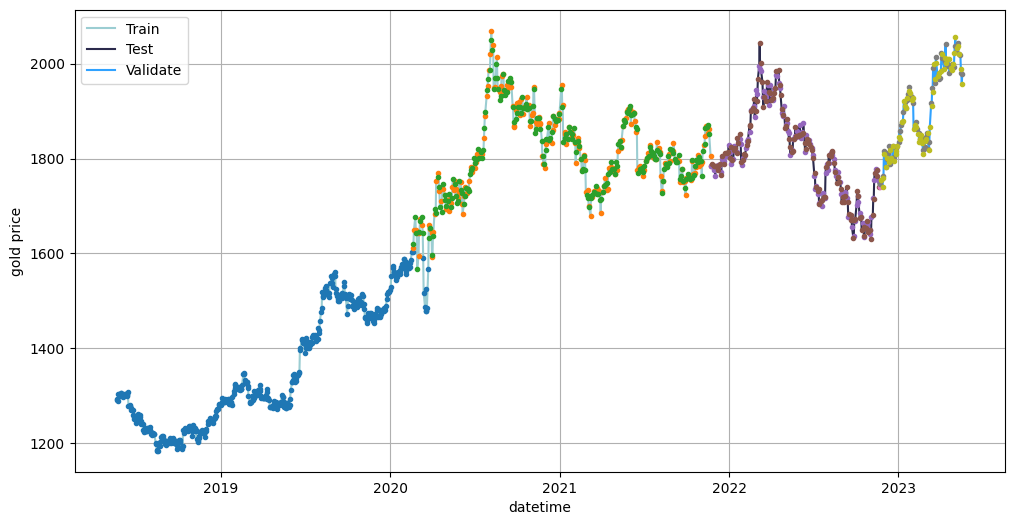

In [ ]:
train_data = data[:train_size]
test_data = data[train_size:train_size+Test_size]
val_data = data[train_size+Test_size:]

plt.figure(figsize=(12, 6))
plt.plot(train_data.Date, train_data.Price, '-', color="#9BCDD2", label='Train')
for i in train_states:
    want = (train_pred == i)
    x = train_data.Date.iloc[want]
    y = train_data.Price.iloc[want]
    plt.plot(x, y, '.')

plt.plot(test_data.Date, test_data.Price, '-', color="#2B2A4C", label='Test')
for i in test_states:
    want = (test_pred == i)
    x = test_data.Date.iloc[want]
    y = test_data.Price.iloc[want]
    plt.plot(x, y, '.')

plt.plot(val_data.Date, val_data.Price, '-', color="#30A2FF", label='Validate')
for i in val_states:
    want = (val_pred == i)
    x = val_data.Date.iloc[want]
    y = val_data.Price.iloc[want]
    plt.plot(x, y, '.')
plt.legend()
plt.grid(True)
plt.xlabel("datetime")
plt.ylabel("gold price")
plt.show()